In [1]:
%matplotlib notebook

#load dependencies
import json
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import pandas as pd
import scipy.stats as st

In [2]:
# read in files
data = pd.read_csv('Clean_Data_Output/Clean_Data_Final.csv')
home_values = pd.read_csv('Resources/median_house_value.csv')
income = pd.read_csv('Clean_Data_Output/Data.csv')

# merge csv files
property_df = pd.merge(data, home_values, on='State', how='outer')
property_df = pd.merge(property_df, income, on='State', how='outer')

# check the file has been read in
property_df.head()

,Unnamed: 0_x,State,Total Murders (2019)_x,2019 Population_x,Murders Per Capita/Homicide Rate,Unemployment Rate,Abbreviation,Average FICO Score,Median Home Value,Average Outstanding Mortgage Amount,Difference Between Value and Mortgage Balance,,Unnamed: 0_y,Median Income (2019),2019 Population_y,Population (2019),Total Murders (2019)_y
0,45,Vermont,11.0,623989.0,0.00002,2.3,VT,726,210600,147241,63359,,45,74305,8535519,8535519,11
1,44,Utah,66.0,3205958.0,0.00002,2.3,UT,716,351100,216213,134887,,44,84523,623989,623989,66
2,40,South Carolina,445.0,5148714.0,0.00009,2.3,SC,681,170700,160059,10641,,40,62028,884659,884659,445
3,34,North Dakota,26.0,762062.0,0.00003,2.4,ND,727,210000,162774,47226,NaN,34,70031,11689100,11689100,26
4,5,Colorado,209.0,5758736.0,0.00004,2.5,CO,718,381300,259113,122187,,5,72499,3565287,3565287,209


In [9]:
# clean dataframe with only the relevant data
data_df = property_df[['State', '2019 Population_x', 'Median Income (2019)', 'Median Home Value','Unemployment Rate',
                        'Total Murders (2019)_x', 'Murders Per Capita/Homicide Rate']]

data_df = data_df.rename(columns={'2019 Population_x':'Total Population', 'Median Income (2019)':'Median Income', 
                                 'Total Murders (2019)_x':'Total Murders', 'Murders Per Capita/Homicide Rate':'Homicide Rate'})
# check dataframe for any errors
data_df.head()

data_df = data_df.sort_values(by='Homicide Rate', ascending=False)

data_df.head()

,State,Total Population,Median Income,Median Home Value,Unemployment Rate,Total Murders,Homicide Rate
48,District of Columbia,705749.0,93111,567800,5.3,166.0,0.00024
46,Louisiana,4648794.0,51707,147600,4.9,522.0,0.00011
25,Maryland,6045680.0,95572,290500,3.5,551.0,0.00009
21,Missouri,6137428.0,60597,163700,3.3,566.0,0.00009
50,Alaska,731545.0,78394,326000,6.0,69.0,0.00009


The correlation coefficient between the two factors is 0.049
The r-squared is: 0.0023795858008970215


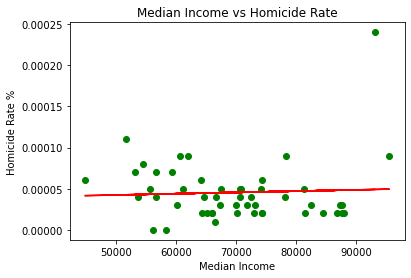

In [4]:
# create scatter plot for median income and homicide rate

# plot lineregress
x_values = data_df['Median Income']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Income')
plt.ylabel('Homicide Rate %')
plt.title('Median Income vs Homicide Rate')

# print r-valaue and show plot
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save fig as output
#plt.savefig('Image Output/median_income_cd')


The correlation coefficient between the two factors is 0.143
The r-squared is: 0.02043860266492385


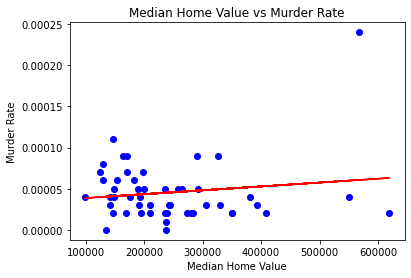

In [5]:
# create scatter plot for median home value and total murders

# plot lineregress
x_values = data_df['Median Home Value']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Home Value')
plt.ylabel('Homicide Rate %')
plt.title('Median Home Value vs Murder Rate')

# print r-valaue and correlation
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
#plt.savefig('Image Output/home_value_cd')

The correlation coefficient between the two factors is 0.502
The r-squared is: 0.25247547300263673


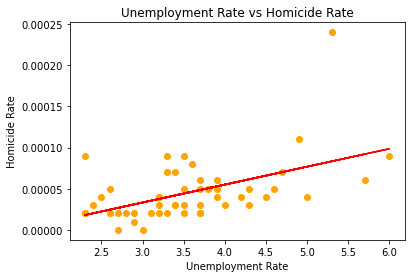

In [6]:
# create scatter plot for unemployment rate and murder rate

# plot lineregress
x_values = data_df['Unemployment Rate']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='orange')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('Homicide Rate %')
plt.title('Unemployment Rate vs Homicide Rate')

# print r-valaue and show plot
unemployment = data_df['Unemployment Rate']
homicide_rate = data_df['Homicide Rate']
corr = st.pearsonr(unemployment, homicide_rate)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
#plt.savefig('Image Output/unemployment_df')

In [7]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations

hm_corr = data_df.corr()
hm_corr.unstack().sort_values()

hm_corr

,Population,Median Income,Median Home Value,Unemployment Rate,Total Murders,Homicide Rate
Population,1.000000,0.011151,0.169137,0.042558,0.847571,-0.074669
Median Income,0.011151,1.000000,0.702282,-0.192988,-0.015007,0.048781
Median Home Value,0.169137,0.702282,1.000000,-0.024518,0.079397,0.142964
Unemployment Rate,0.042558,-0.192988,-0.024518,1.000000,0.153039,0.502469
Total Murders,0.847571,-0.015007,0.079397,0.153039,1.000000,0.233241
Homicide Rate,-0.074669,0.048781,0.142964,0.502469,0.233241,1.000000


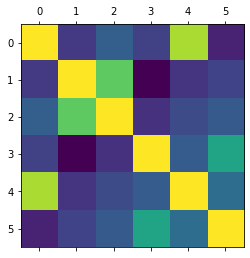

In [8]:
# correlation map for fun

plt.matshow(data_df.corr())
plt.show()